# Predicting hart disease

## Introduction

Relevance. According to a report of the American Heart Association Statistics (2016), heart disease is the leading cause of death for both men and women and responsible for 1 in every 4 deaths, even modest improvements in prognostic models of heart event and complications could save literally hundreds of lives and help to significantly reduce the cost of health care services, medications, and lost productivity.


file:///C:/Users/User/Downloads/350-904-1-PB%20(1).pdf
http://inpressco.com/wp-content/uploads/2017/10/Paper271842-1853.pdf

## Methods 

Deep neural networks (DNN) represents a set of modern machine learning (ML) models that have gain widespread recognition because they were behind the first FDA (US food and drug administration) approved machine learning application in healthcare; to be approved it had to pass tests to show it can produce results at least as accurately as humans are currently able to. Recently, such ML models were also used to detect with cardiologist-level accuracy 14 types of arrhythmias (sometime life-threatening heart beats) form ECG-electrocardiogram signals generated by wearable monitors. 

## Original contribution

Studies exploring the potential of this technology for the prognosis of cardiovascular events/complications from risk factors have been limited; events/complications are, for example, coronary artery disease, stroke and congestive heart failure, and risk factors are those established by the American College of Cardiology/American Heart Association (ACC/AHA) such as age, high blood pressure, high LDL cholesterol, and smoking and others, such as, systolic blood pressure variability, kidney disease, and ethnicity. 

Most of previous studies have either used logistic regression or classical machine learning algorithms such as random forest, gradient boosting and neural networks (non-deep); in addition, comparison studies of the cited algorithms with deep learning models in the specific prognosis context under consideration are not readily available. 

## Research objectives

Establish the relative performance of deep learning models, such as deep belief networks and convolutional neural networks, and ensembles with respect to classical machine learning algorithms (including logistic regression) using cases studies built from well-known heart disease data sets such as the Cleveland set available from the UCI repository. Research questions of interest are, for example, for what would be the threshold of sample size in heart disease studies where the more complex but potentially more effective deep learning models would be recommended?, would ensembles of machine learning models be able to provide more robust predictions as it has been the case in other knowledge domains?, does the ACC/AHA list of eight risk factors should be updated with other genetic or lifestyle factors?. The deep learning models will be implemented in Tensorflow (originally from Google, now open source) and healthcare.ai, an open source that facilitate the development of machine learning in healthcare, with the prevision that can handle so called big data by using the Hadoop/Spark platform.   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

from imblearn.over_sampling import SMOTE #for SMOTE -> install package using: conda install -c conda-forge imbalanced-learn 


In [2]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import ggplot
import scipy
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC

C:\Users\RyanT\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\RyanT\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\RyanT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note

In [3]:
features_list = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']
dataset1=pd.read_csv("Heart_Disease_Data.csv")
dataset2=pd.read_csv("Heart_Disease_Data.csv")
dataset1.dtypes

age                 int64
sex                 int64
cp                  int64
trestbps            int64
chol                int64
fbs                 int64
restecg             int64
thalach             int64
exang               int64
oldpeak           float64
slop                int64
ca                 object
thal               object
pred_attribute      int64
dtype: object

In [4]:
# If you already have numeric dtypes (int8|16|32|64,float64,boolean) you can convert it to another "numeric" dtype using Pandas .astype() method. Demo: In [90]: df = pd.DataFrame(np.random.randint(10**5,10**7,(5,3)),columns=list('abc'), dtype=np.int64) In [91]: df Out[91]: a b c 0 9059440 9590567 2076918 1 5861102 4566089 1947323 2 6636568 162770 2487991 3 6794572 5236903 5628779 4 470121 4044395 4546794 In [92]: df.dtypes Out[92]: a int64 b int64 c int64 dtype: object In [93]: df['a'] = df['a'].astype(float) In [94]: df.dtypes Out[94]: a float64 b int64 c int64 dtype: object It won't work for object (string) dtypes, that can't be converted to numbers: In [95]: df.loc[1, 'b'] = 'XXXXXX' In [96]: df Out[96]:...
# Just make everything numeric for ease
dataset1 = dataset1.convert_objects(convert_numeric=True)
dataset1 = dataset1.astype('float')
# 1. age: continuous
# 2. sex: categorical, 2 values {0: female, 1: male}
#  3. cp (chest pain type): categorical, 4 values
#     {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
#  4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
#  5. chol (serum cholesterol level): continuous (mg/dl)
#  6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
#  7. restecg (resting electrocardiography): categorical, 3 values
#     {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
#  8. thalach (maximum heart rate achieved): continuous
#  9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
# 10. oldpeak (ST depression induced by exercise relative to rest): continuous
# 11. slope (slope of peak exercise ST segment): categorical, 3 values 
#     {1: upsloping, 2: flat, 3: downsloping}
# 12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
# 13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
# 14. num (diagnosis of heart disease): categorical, 5 values 
#     {0: less than 50% narrowing in any major vessel, 
#     1-4: more than 50% narrowing in 1-4 vessels}
# number of vessels which are narrowing --> don't think this is categorical!

# dataset[['col2','col3']] = df[['col2','col3']].apply(pd.to_category)

dataset1["sex"] = dataset1["sex"].astype('category')
dataset1["cp"] = dataset1["cp"].astype('category')
dataset1["restecg"] = dataset1["restecg"].astype('category')
dataset1["exang"] = dataset1["exang"].astype('category')
dataset1["slop"] = dataset1["slop"].astype('category')
dataset1["thal"] = dataset1["thal"].astype('category')
# dataset1['fbs'] = dataset1['fbs'].astype('category')
dataset1.dtypes
# SVM requires that each data instance is represented as a vector of real numbers

C:\Users\RyanT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


age                float64
sex               category
cp                category
trestbps           float64
chol               float64
fbs                float64
restecg           category
thalach            float64
exang             category
oldpeak            float64
slop              category
ca                 float64
thal              category
pred_attribute     float64
dtype: object

In [5]:
#### count missing value in terms of colunms #######
#dataset.shape[0] - dataset.count()
dataset1.isnull()
dataset1.isnull().any()

age               False
sex               False
cp                False
trestbps          False
chol              False
fbs               False
restecg           False
thalach           False
exang             False
oldpeak           False
slop              False
ca                 True
thal               True
pred_attribute    False
dtype: bool

In [6]:
dataset1.duplicated().any()

False

There are no missing values and/or any duplicated data in this dataset.

In [7]:
def checkforoutlier(df):
    outliersnumbers = 0
    for column in df:
        for number in df[column]:
            if number < np.percentile(
                df[column], 25)-(np.percentile(
                df[column], 75)-np.percentile(
                df[column], 25)) or number > np.percentile(
                df[column], 75)+(np.percentile(
                df[column], 75)-np.percentile(
                df[column], 25)):
                    print("outlier: ", number)
                    outliersnumbers += 1
    return outliersnumbers, 'outliers. That is', round(float(outliersnumbers)/float(len(df[column]))*100, 0), 'percent of the total list'

print(checkforoutlier(dataset1))

outlier:  34.0
outlier:  29.0
outlier:  77.0
outlier:  34.0
outlier:  76.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  172.0
outlier:  170.0
outlier:  180.0
outlier:  200.0
outlier:  94.0
outlier:  170.0
outlier:  165.0
outlier:  174.0
outlier:  178.0
outlier:  192.0
outlier:  180.0
outlier:  178.0
outlier:  94.0
outlier:  180.0
outlier:  170.0
outlier:  170.0
outlier:  164.0
outlier:  354.0
outlier:  340.0
outlier:  353.0
outlier:  417.0
outlier:  360.0
outlier:  141.0
outlier:  341.0
outlier:  407.0
outlier:  564.0
outlier:  394.0
outlier:  409.0
outlier:  126.0
outlier:  342.0
outlier:  131.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1.0
outlier:  1

C:\Users\RyanT\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


(130, 'outliers. That is', 43.0, 'percent of the total list')


In [8]:
# dataset1 = dataset1.fillna(value=0)

# 1. Preliminary description of the data.
Box plots and histograms were used for continuous and categorical variables.
Basic statistics are also available.

# Univariate analysis

# Continuous variables 
basic statistics + Box plots + histograms 

In [9]:
## basic statistic descriptions
continuas=["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
dataset1[continuas].describe()

age    trestbps        chol     thalach     oldpeak          ca
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.672241
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.937438
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000
75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000

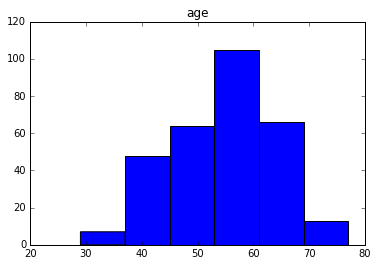

In [10]:
## age histogram
ag= np.array(dataset1['age']) 
plt.hist(ag, bins = 6) 
plt.title("age") 
plt.show()

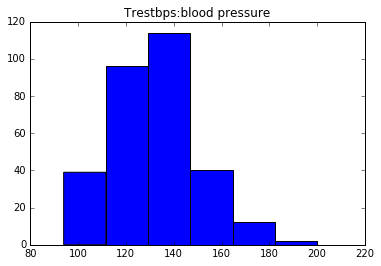

In [11]:
## trestbps histogram
tp= np.array(dataset1['trestbps']) 
plt.hist(tp, bins=6) 
plt.title("Trestbps:blood pressure") 
plt.show()

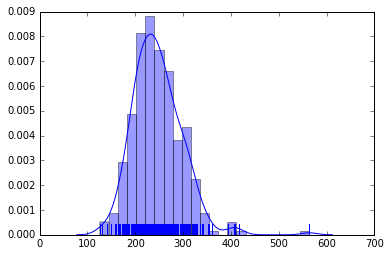

In [12]:
## chol histogram
ch= np.array(dataset1['chol'])
sns.distplot(ch, rug=True, hist=True)


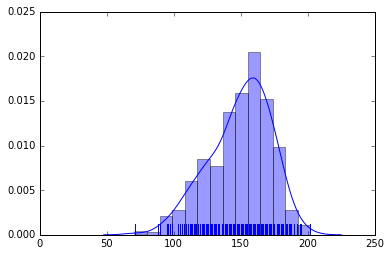

In [13]:
## thalach histogram and distribution 
tl= np.array(dataset1['thalach'])
sns.distplot(tl, rug=True, hist=True)

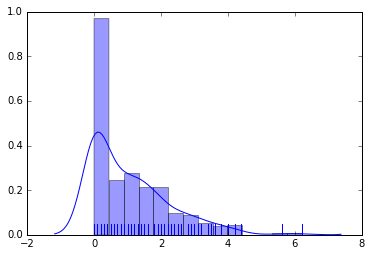

In [14]:
## oldpeak histogram and distribution 
op= np.array(dataset1['oldpeak'])
sns.distplot(op, rug=True, hist=True)

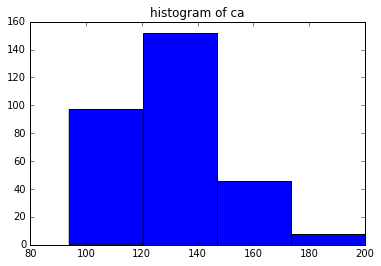

In [15]:
## thalach histogram
ca= np.array(dataset1['ca']) 
plt.hist(tp, bins=4) 
plt.title("histogram of ca") 
plt.show()

### Categorical variables 
##### Histograms + basic statistics

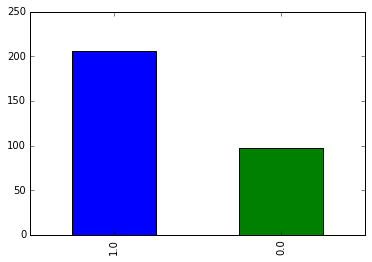

In [16]:
#Sex: sex (1 = male; 0 = female) 
tempo5 = dataset1['sex']
tempo5.value_counts().plot(kind="bar")

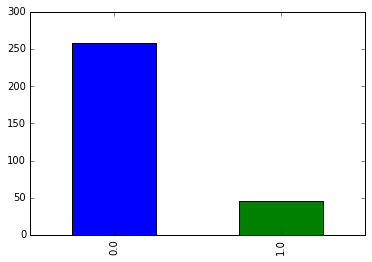

In [17]:
#Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
tempo6 = dataset1['fbs']
tempo6.value_counts().plot(kind="bar")

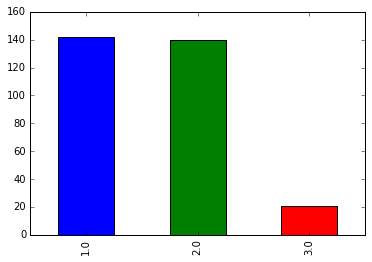

In [18]:
#Slope: the slope of the peak exercise ST segment  
#Value 1: upsloping 
#Value 2: flat 
#Value 3: downsloping
tempo7 = dataset1['slop']
tempo7.value_counts().plot(kind="bar")

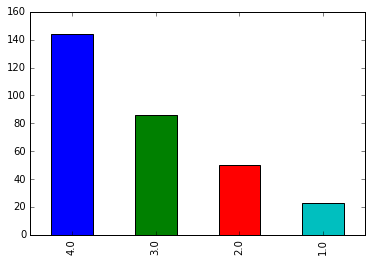

In [19]:
#Cp: chest pain type
#Value 1: typical angina 
#Value 2: atypical angina 
#Value 3: non-anginal pain 
#Value 4: asymptomatic 
tempo8 = dataset1['cp']
tempo8.value_counts().plot(kind="bar")

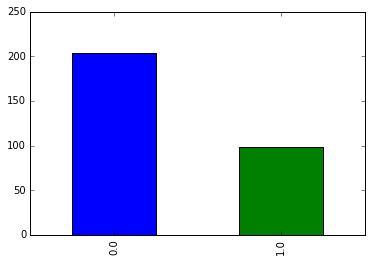

In [20]:
#Exang: exercise induced angina (1 = yes; 0 = no) 
tempo9 = dataset1['exang']
tempo9.value_counts().plot(kind="bar")

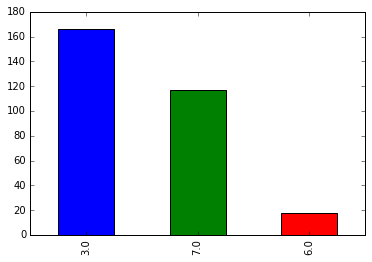

In [21]:
#Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
tempo10 = dataset1['thal']
tempo10.value_counts().plot(kind="bar")

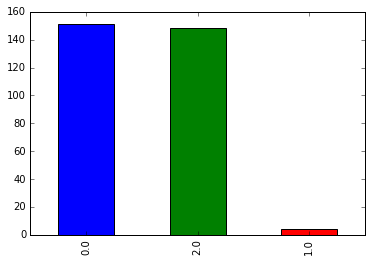

In [22]:
#Restecg: resting electrocardiographic results 
#Value 0: normal 
#Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
tempo11 = dataset1['restecg']
tempo11.value_counts().plot(kind="bar")

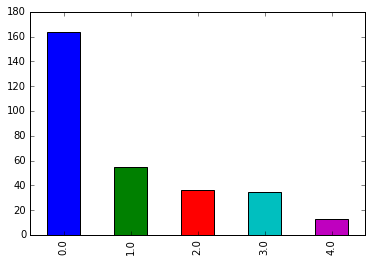

In [23]:
#Class: diagnosis of heart disease (angiographic disease status) 
#Value 0: < 50% diameter narrowing (Healthy)
#Value 1: > 50% diameter narrowing (Sick)
tempo12 = dataset1['pred_attribute']
tempo12.value_counts().plot(kind="bar")

# Multivariate analysis

In [24]:
# from ggplot import *
# p = ggplot(dataset1,aes(x='pred_attribute'))
# p + geom_bar()+facet_wrap('sex')  #### relationship between pred_attribute and sex

In [25]:
# ##### relationship between age and trestbps
# p = ggplot(dataset1,aes(x='age'))
# p+geom_histogram()+facet_wrap('pred_attribute')


In [26]:
# p=ggplot(dataset1,aes(x='age',y='trestbps'))
# p+geom_line()+facet_wrap('pred_attribute')

In [27]:
# p=ggplot(dataset1,aes(x='age',y='thalach'))
# p+geom_line()+facet_wrap('pred_attribute')

In [28]:
# p = ggplot(dataset1,aes(x='pred_attribute'))
# p + geom_bar()+facet_wrap('cp') 

In [29]:
# p = ggplot(dataset1,aes(x='pred_attribute'))
# p + geom_bar()+facet_wrap('fbs') 
# ggplot(data)+geom_histogram(aes(x=price, fill=cut), position="dodge")

# data processing
 outlier and balance

In [30]:
# ## Boxplots of all continuous variable
# continuas=["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
# dataset[continuas].boxplot(return_type='axes', figsize=(12,8))
# plt.show()

In [31]:
# ### show the patients whose trestbps above 180
# print(dataset[dataset['trestbps']>=180])


In [32]:
# ### show the patients whose chol above 370
# print(dataset[dataset['chol']>400])

In [33]:
# ### show the patients whose thalach below 180
# print(dataset[dataset['thalach']<90])

In [34]:
# ### show the patients whose thalach below 180
# print(dataset[dataset['oldpeak']>5])


In [35]:
# #### delete outliers by mean
# dataset1=dataset1.drop([83,126,188,201,231,48,121,152,181,175,245,91,123])


In [36]:
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.cluster import KMeans
#data=dataset1
#estimator = KMeans(n_clusters=3)
#estimator.fit(data)#聚类
#label_pred = estimator.labels_ #获取聚类标签
#centroids = estimator.cluster_centers_ 
#inertia = estimator.inertia_ 
#mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr'] 
#color = 0
#j = 0 
#for i in label_pred:
    #plt.plot([data[j:j+1,0]], [data[j:j+1,1]], mark[i], markersize = 5)
    #j +=1
#plt.show()''''''

# correlation between variables

In [37]:
dataset2.corr()

age       sex        cp  trestbps      chol       fbs  \
age             1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex            -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp              0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps        0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol            0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs             0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg         0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach        -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang           0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak         0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slop            0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
pred_attribute  0.222853  0.224469  0.407075  0.157754  0.070909  0.059186   

                 restecg   thalach     exang   oldpeak      slop  \
age             0.148868 -0.393806  0.091661  0.203805  0.161770   
sex             0.021647 -0.048663  0.146201  0.102173  0.037533   
cp              0.067505 -0.334422  0.384060  0.202277  0.152050   
trestbps        0.146560 -0.045351  0.064762  0.189171  0.117382   
chol            0.171043 -0.003432  0.061310  0.046564 -0.004062   
fbs             0.069564 -0.007854  0.025665  0.005747  0.059894   
restecg         1.000000 -0.083389  0.084867  0.114133  0.133946   
thalach        -0.083389  1.000000 -0.378103 -0.343085 -0.385601   
exang           0.084867 -0.378103  1.000000  0.288223  0.257748   
oldpeak         0.114133 -0.343085  0.288223  1.000000  0.577537   
slop            0.133946 -0.385601  0.257748  0.577537  1.000000   
pred_attribute  0.183696 -0.415040  0.397057  0.504092  0.377957   

                pred_attribute  
age                   0.222853  
sex                   0.224469  
cp                    0.407075  
trestbps              0.157754  
chol                  0.070909  
fbs                   0.059186  
restecg               0.183696  
thalach              -0.415040  
exang                 0.397057  
oldpeak               0.504092  
slop                  0.377957  
pred_attribute        1.000000

### 2. Define training and test samples. 

The Cleveland data set available from the UCI repository has 303 samples; the training and test data sets were randomly selected with 30% of the original data set corresponding to the test data set.  The relative proportions of the classes of interest (disease/no disease) in both sets were checked to be similar.

In [38]:
dataset1

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0     2.0    150.0   0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0     2.0    108.0   1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0     2.0    129.0   1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0     0.0    187.0   0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0     2.0    172.0   0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0     0.0    178.0   0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0     2.0    160.0   0.0      3.6   
7    57.0  0.0  4.0     120.0  354.0  0.0     0.0    163.0   1.0      0.6   
8    63.0  1.0  4.0     130.0  254.0  0.0     2.0    147.0   0.0      1.4   
9    53.0  1.0  4.0     140.0  203.0  1.0     2.0    155.0   1.0      3.1   
10   57.0  1.0  4.0     140.0  192.0  0.0     0.0    148.0   0.0      0.4   
11   56.0  0.0  2.0     140.0  294.0  0.0     2.0    153.0   0.0      1.3   
12   56.0  1.0  3.0     130.0  256.0  1.0     2.0    142.0   1.0      0.6   
13   44.0  1.0  2.0     120.0  263.0  0.0     0.0    173.0   0.0      0.0   
14   52.0  1.0  3.0     172.0  199.0  1.0     0.0    162.0   0.0      0.5   
15   57.0  1.0  3.0     150.0  168.0  0.0     0.0    174.0   0.0      1.6   
16   48.0  1.0  2.0     110.0  229.0  0.0     0.0    168.0   0.0      1.0   
17   54.0  1.0  4.0     140.0  239.0  0.0     0.0    160.0   0.0      1.2   
18   48.0  0.0  3.0     130.0  275.0  0.0     0.0    139.0   0.0      0.2   
19   49.0  1.0  2.0     130.0  266.0  0.0     0.0    171.0   0.0      0.6   
20   64.0  1.0  1.0     110.0  211.0  0.0     2.0    144.0   1.0      1.8   
21   58.0  0.0  1.0     150.0  283.0  1.0     2.0    162.0   0.0      1.0   
22   58.0  1.0  2.0     120.0  284.0  0.0     2.0    160.0   0.0      1.8   
23   58.0  1.0  3.0     132.0  224.0  0.0     2.0    173.0   0.0      3.2   
24   60.0  1.0  4.0     130.0  206.0  0.0     2.0    132.0   1.0      2.4   
25   50.0  0.0  3.0     120.0  219.0  0.0     0.0    158.0   0.0      1.6   
26   58.0  0.0  3.0     120.0  340.0  0.0     0.0    172.0   0.0      0.0   
27   66.0  0.0  1.0     150.0  226.0  0.0     0.0    114.0   0.0      2.6   
28   43.0  1.0  4.0     150.0  247.0  0.0     0.0    171.0   0.0      1.5   
29   40.0  1.0  4.0     110.0  167.0  0.0     2.0    114.0   1.0      2.0   
..    ...  ...  ...       ...    ...  ...     ...      ...   ...      ...   
273  71.0  0.0  4.0     112.0  149.0  0.0     0.0    125.0   0.0      1.6   
274  59.0  1.0  1.0     134.0  204.0  0.0     0.0    162.0   0.0      0.8   
275  64.0  1.0  1.0     170.0  227.0  0.0     2.0    155.0   0.0      0.6   
276  66.0  0.0  3.0     146.0  278.0  0.0     2.0    152.0   0.0      0.0   
277  39.0  0.0  3.0     138.0  220.0  0.0     0.0    152.0   0.0      0.0   
278  57.0  1.0  2.0     154.0  232.0  0.0     2.0    164.0   0.0      0.0   
279  58.0  0.0  4.0     130.0  197.0  0.0     0.0    131.0   0.0      0.6   
280  57.0  1.0  4.0     110.0  335.0  0.0     0.0    143.0   1.0      3.0   
281  47.0  1.0  3.0     130.0  253.0  0.0     0.0    179.0   0.0      0.0   
282  55.0  0.0  4.0     128.0  205.0  0.0     1.0    130.0   1.0      2.0   
283  35.0  1.0  2.0     122.0  192.0  0.0     0.0    174.0   0.0      0.0   
284  61.0  1.0  4.0     148.0  203.0  0.0     0.0    161.0   0.0      0.0   
285  58.0  1.0  4.0     114.0  318.0  0.0     1.0    140.0   0.0      4.4   
286  58.0  0.0  4.0     170.0  225.0  1.0     2.0    146.0   1.0      2.8   
287  58.0  1.0  2.0     125.0  220.0  0.0     0.0    144.0   0.0      0.4   
288  56.0  1.0  2.0     130.0  221.0  0.0     2.0    163.0   0.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0     0.0    169.0   0.0      0.0   
290  67.0  1.0  3.0     152.0  212.0  0.0     2.0    150.0   0.0      0.8   
291  55.0  0.0  2.0     132.0  342.0  0.0     0.0    166.0   0.0      1.2   
292  44.0  1.0  4.0     120.0  169.0  0.0     0.0    144.0   1.0      2.8   
29

In [39]:
### Extract features and labels from dataset for local testing:

dataset1.dropna(inplace=True, axis=0, how="any")
X=dataset1.loc[:, "age":"thal" ]
Y=dataset1["pred_attribute"]

In [40]:
# evaluate the model by splitting into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.2, random_state=0)



In [41]:
# Check
print(len(features_train)/(len(features_train)+ len(features_test)))

0.797979797979798


In [42]:
import collections

list1 = []
for i in labels_train:
    list1.append(i)
counter=collections.Counter(list1)
print(counter)

list2 = []
for i in labels_test:
    list2.append(i)
counter=collections.Counter(list2)
print(counter)



Counter({0.0: 130, 1.0: 42, 3.0: 29, 2.0: 28, 4.0: 8})
Counter({0.0: 30, 1.0: 12, 2.0: 7, 3.0: 6, 4.0: 5})


We have an relatively small dataset. Therefore, we should do our feature selection based on a cross-
validated set. We will check this assumption by comparing the scores on a cross-validated set vs the simple split.

In [43]:
features_train_cross, features_test_cross, labels_train_cross, labels_test_cross = train_test_split(X, Y, test_size=0.15, random_state=0)

features_train_cross

age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak  \
45   58.0  1.0  3.0     112.0  230.0  0.0     2.0    165.0   0.0      2.5   
104  49.0  1.0  3.0     120.0  188.0  0.0     0.0    139.0   0.0      2.0   
239  42.0  1.0  2.0     120.0  295.0  0.0     0.0    162.0   0.0      0.0   
162  54.0  0.0  3.0     110.0  214.0  0.0     0.0    158.0   0.0      1.6   
102  57.0  0.0  4.0     128.0  303.0  0.0     2.0    159.0   0.0      0.0   
55   54.0  1.0  4.0     124.0  266.0  0.0     2.0    109.0   1.0      2.2   
285  58.0  1.0  4.0     114.0  318.0  0.0     1.0    140.0   0.0      4.4   
282  55.0  0.0  4.0     128.0  205.0  0.0     1.0    130.0   1.0      2.0   
26   58.0  0.0  3.0     120.0  340.0  0.0     0.0    172.0   0.0      0.0   
66   60.0  1.0  3.0     140.0  185.0  0.0     2.0    155.0   0.0      3.0   
223  53.0  1.0  4.0     123.0  282.0  0.0     0.0     95.0   1.0      2.0   
230  52.0  0.0  3.0     136.0  196.0  0.0     2.0    169.0   0.0      0.1   
250  57.0  1.0  4.0     110.0  201.0  0.0     0.0    126.0   1.0      1.5   
59   51.0  1.0  1.0     125.0  213.0  0.0     2.0    125.0   1.0      1.4   
295  41.0  1.0  2.0     120.0  157.0  0.0     0.0    182.0   0.0      0.0   
286  58.0  0.0  4.0     170.0  225.0  1.0     2.0    146.0   1.0      2.8   
81   53.0  0.0  4.0     130.0  264.0  0.0     2.0    143.0   0.0      0.4   
109  39.0  1.0  4.0     118.0  219.0  0.0     0.0    140.0   0.0      1.2   
147  41.0  1.0  3.0     112.0  250.0  0.0     0.0    179.0   0.0      0.0   
220  41.0  0.0  3.0     112.0  268.0  0.0     2.0    172.0   1.0      0.0   
20   64.0  1.0  1.0     110.0  211.0  0.0     2.0    144.0   1.0      1.8   
46   51.0  1.0  3.0     110.0  175.0  0.0     0.0    123.0   0.0      0.6   
154  64.0  1.0  4.0     120.0  246.0  0.0     2.0     96.0   1.0      2.2   
226  47.0  1.0  4.0     112.0  204.0  0.0     0.0    143.0   0.0      0.1   
232  49.0  1.0  3.0     118.0  149.0  0.0     2.0    126.0   0.0      0.8   
27   66.0  0.0  1.0     150.0  226.0  0.0     0.0    114.0   0.0      2.6   
221  54.0  0.0  3.0     108.0  267.0  0.0     2.0    167.0   0.0      0.0   
259  57.0  1.0  2.0     124.0  261.0  0.0     0.0    141.0   0.0      0.3   
37   57.0  1.0  4.0     150.0  276.0  0.0     2.0    112.0   1.0      0.6   
93   44.0  0.0  3.0     108.0  141.0  0.0     0.0    175.0   0.0      0.6   
..    ...  ...  ...       ...    ...  ...     ...      ...   ...      ...   
272  46.0  1.0  4.0     140.0  311.0  0.0     0.0    120.0   1.0      1.8   
148  45.0  1.0  2.0     128.0  308.0  0.0     2.0    170.0   0.0      0.0   
277  39.0  0.0  3.0     138.0  220.0  0.0     0.0    152.0   0.0      0.0   
179  53.0  1.0  3.0     130.0  246.0  1.0     2.0    173.0   0.0      0.0   
100  45.0  1.0  4.0     115.0  260.0  0.0     2.0    185.0   0.0      0.0   
200  50.0  0.0  4.0     110.0  254.0  0.0     2.0    159.0   0.0      0.0   
246  58.0  1.0  4.0     100.0  234.0  0.0     0.0    156.0   0.0      0.1   
116  58.0  1.0  3.0     140.0  211.0  1.0     2.0    165.0   0.0      0.0   
269  42.0  1.0  3.0     130.0  180.0  0.0     0.0    150.0   0.0      0.0   
72   62.0  1.0  4.0     120.0  267.0  0.0     0.0     99.0   1.0      1.8   
25   50.0  0.0  3.0     120.0  219.0  0.0     0.0    158.0   0.0      1.6   
167  54.0  0.0  2.0     132.0  288.0  1.0     2.0    159.0   1.0      0.0   
289  56.0  1.0  2.0     120.0  240.0  0.0     0.0    169.0   0.0      0.0   
176  52.0  1.0  4.0     108.0  233.0  1.0     0.0    147.0   0.0      0.1   
291  55.0  0.0  2.0     132.0  342.0  0.0     0.0    166.0   0.0      1.2   
39   61.0  1.0  3.0     150.0  243.0  1.0     0.0    137.0   1.0      1.0   
196  69.0  1.0  1.0     160.0  234.0  1.0     2.0    131.0   0.0      0.1   
89   51.0  0.0  3.0     130.0  256.0  0.0     2.0    149.0   0.0      0.5   
70   65.0  0.0  3.0     155.0  269.0  0.0     0.0    148.0   0.0      0.8   
88   53.0  0.0  4.0     138.0  234.0  0.0     2.0    160.0   0.0      0.0   
24

## SMOTE for SVM - Balancing only on the training set, not the validation set  [This is for the traditional training -not the cross validated one]

In [44]:
#further divide the 'traditional' non-cross set into training 80/20  for pure training and cross validation  
features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate = train_test_split(features_train, labels_train, test_size = .1, random_state=0)

In [46]:
sm = SMOTE(random_state=0, ratio = 1.0, kind= 'svm' )
features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train_notoversampled, labels_train_notoversampled)

#re-enter into original variables
#features_train = features_train_oversampled

#labels_train = labels_train_oversampled



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [53]:

features_train = pd.DataFrame(features_train_oversampled,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slop","ca","thal"])
labels_train = pd.DataFrame(labels_train_oversampled,columns=["pred_attribute"])

In [54]:
features_train

age       sex   cp    trestbps        chol       fbs   restecg  \
0    60.000000  1.000000  4.0  125.000000  258.000000  0.000000  2.000000   
1    35.000000  0.000000  4.0  138.000000  183.000000  0.000000  0.000000   
2    53.000000  1.000000  3.0  130.000000  197.000000  1.000000  2.000000   
3    57.000000  1.000000  2.0  124.000000  261.000000  0.000000  0.000000   
4    64.000000  0.000000  4.0  130.000000  303.000000  0.000000  0.000000   
5    59.000000  1.000000  4.0  110.000000  239.000000  0.000000  2.000000   
6    54.000000  0.000000  2.0  132.000000  288.000000  1.000000  2.000000   
7    59.000000  1.000000  3.0  150.000000  212.000000  1.000000  0.000000   
8    69.000000  1.000000  1.0  160.000000  234.000000  1.000000  2.000000   
9    71.000000  0.000000  2.0  160.000000  302.000000  0.000000  0.000000   
10   66.000000  0.000000  4.0  178.000000  228.000000  1.000000  0.000000   
11   34.000000  1.000000  1.0  118.000000  182.000000  0.000000  2.000000   
12   39.000000  1.000000  3.0  140.000000  321.000000  0.000000  2.000000   
13   46.000000  1.000000  4.0  140.000000  311.000000  0.000000  0.000000   
14   57.000000  1.000000  4.0  110.000000  335.000000  0.000000  0.000000   
15   43.000000  1.000000  3.0  130.000000  315.000000  0.000000  0.000000   
16   55.000000  0.000000  2.0  135.000000  250.000000  0.000000  2.000000   
17   60.000000  1.000000  4.0  140.000000  293.000000  0.000000  2.000000   
18   42.000000  1.000000  1.0  148.000000  244.000000  0.000000  2.000000   
19   46.000000  1.000000  2.0  101.000000  197.000000  1.000000  0.000000   
20   42.000000  0.000000  3.0  120.000000  209.000000  0.000000  0.000000   
21   64.000000  1.000000  4.0  120.000000  246.000000  0.000000  2.000000   
22   60.000000  0.000000  3.0  102.000000  318.000000  0.000000  0.000000   
23   56.000000  0.000000  2.0  140.000000  294.000000  0.000000  2.000000   
24   46.000000  1.000000  3.0  150.000000  231.000000  0.000000  0.000000   
25   44.000000  1.000000  3.0  120.000000  226.000000  0.000000  0.000000   
26   58.000000  0.000000  4.0  130.000000  197.000000  0.000000  0.000000   
27   45.000000  1.000000  4.0  104.000000  208.000000  0.000000  2.000000   
28   60.000000  1.000000  4.0  130.000000  206.000000  0.000000  2.000000   
29   70.000000  1.000000  4.0  145.000000  174.000000  0.000000  0.000000   
..         ...       ...  ...         ...         ...       ...       ...   
392  53.158115  1.000000  4.0  156.767388  263.753324  0.451159  2.000000   
393  50.399753  1.000000  4.0  149.900062  241.620851  0.000000  1.960025   
394  58.834218  1.000000  4.0  147.791445  212.521946  0.000000  1.116578   
395  69.591735  1.000000  4.0  145.102066  175.408516  0.000000  0.040827   
396  60.391667  1.000000  4.0  154.608333  247.663887  0.000000  1.281111   
397  60.847148  0.519106  4.0  157.786597  258.222814  0.519106  2.000000   
398  54.670082  0.688661  4.0  150.000000  237.395901  0.000000  2.000000   
399  60.597621  0.880476  4.0  132.390482  208.270958  0.000000  2.000000   
400  68.937061  1.000000  4.0  146.635291  183.402921  0.081765  0.163529   
401  61.747668  0.216822  4.0  150.000000  228.902798  0.000000  2.000000   
402  56.130378  1.000000  4.0  162.825944  289.000000  0.565189  2.000000   
403  58.079180  0.865103  4.0  162.976538  280.366564  0.865103  2.000000   
404  52.455155  1.000000  4.0  154.910310  265.587428  0.000000  2.000000   
405  54.583615  1.000000  4.0  159.167230  285.169256  0.000000  2.000000   
406  69.605788  0.921158  4.0  145.394212  178.020962  0.000000  0.157685   
407  63.753313  0.083112  4.0  150.000000  226.496025  0.000000  2.000000   
408  60.834222  0.277719  4.0  150.000000  229.998934  0.000000  2.000000   
409  64.906433  0.009357  4.0  150.093567  225.598829  0.000000  2.000000   
410  55.315316  1.000000  4.0  160.788290  289.000000  0.157658  2.000000   
411  52.469781  1.000000  4.0  155.292388  259.229990  0.352826  2.000000   
412  59

In [55]:
labels_train

pred_attribute
0               1.0
1               0.0
2               0.0
3               1.0
4               0.0
5               2.0
6               0.0
7               0.0
8               0.0
9               0.0
10              3.0
11              0.0
12              0.0
13              2.0
14              2.0
15              0.0
16              0.0
17              2.0
18              0.0
19              0.0
20              0.0
21              3.0
22              0.0
23              0.0
24              1.0
25              0.0
26              0.0
27              0.0
28              4.0
29              4.0
..              ...
392             4.0
393             4.0
394             4.0
395             4.0
396             4.0
397             4.0
398             4.0
399             4.0
400             4.0
401             4.0
402             4.0
403             4.0
404             4.0
405             4.0
406             4.0
407             4.0
408             4.0
409             4.0
410             4.0
411             4.0
412             4.0
413             4.0
414             4.0
415             4.0
416             4.0
417             4.0
418             4.0
419             4.0
420             4.0
421             4.0

[422 rows x 1 columns]

### 3. Make models

#### 3.1 make pipeline

##### scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

SVM needs a scalar: https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. However, this scaling compress all inliers in the narrow ranges. Minmaxscalar also suffers from the presence of large outliers. 

In [57]:
scaler = preprocessing.MinMaxScaler()

Unlike the previous scaler, the centering and scaling statistics of Robust scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: for both features most of the transformed values lie in a [-2, 3] range as seen in the zoomed-in figure. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required (see below).

In [58]:
Robust_scaler = preprocessing.RobustScaler(quantile_range=(25, 75))

QuantileTransformer applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform distribution. In this case, all the data will be mapped in the range [0, 1], even the outliers which cannot be distinguished anymore from the inliers. QuantileTransformer has an additional output_distribution parameter allowing to match a Gaussian distribution instead of a uniform distribution


In [59]:
Quantile_scalar = preprocessing.QuantileTransformer(output_distribution='normal')

##### Selecting features

SelectKBest is way to select the most powerfull features. It is also possible to do this manually, in my experience this may improve the results drastically.

In [60]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k = 2)
skb3 = SelectKBest(k = 3)
skb4 = SelectKBest(k = 4)
skb7 = SelectKBest(k = 7)

#### 3.2 selecting a Kernel & it's parameters

##### start with RGB, because we don't have a lot of features.

In [61]:
# Nice visualisations:
    
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import data
X = np.array(features_test)
y = np.array(labels_test)
class_names = np.array(['No disease', 'Disease 1', 'Disease 2', 'Disease 3', 'Disease 4'],
      dtype='<U10')

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [62]:
from sklearn.metrics import accuracy_score
from sklearn import grid_search
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm

def checkmetrics(pred, labels_test, name):
    print('The accuracy is of a', name, 'is: ', accuracy_score(pred, labels_test))
    # print 'if everyone had 0 score: ', float(float(len(pred))-float(numberpoi))/float(len(pred))
    matrix = confusion_matrix(labels_test, pred)
    print('There are', matrix[0][0], 'healthy people correctly identified vs', matrix[2][2] +matrix[3][3] +matrix[4][4] +matrix[1][1], 'sick ones. See:\n', matrix)
    print(classification_report(pred, labels_test))
#     print('precision score:', precision_score( pred, labels_test))
#     if precision_score(pred, labels_test) < recall_score(pred, labels_test):
#         print('precision < recall, so higher chance on POIs get identified, but also more false positives')
#     if precision_score(pred, labels_test) > recall_score(pred, labels_test):
#         print('precision > recall, so lower chance on POIs get identified, but also less false positives')
#     print('f1 score: ', f1_score(pred, labels_test), '\n\n')

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


The accuracy is of a support vector machine, Radial Basis Function is:  0.5
There are 30 healthy people correctly identified vs 0 sick ones. See:
 [[30  0  0  0  0]
 [12  0  0  0  0]
 [ 7  0  0  0  0]
 [ 6  0  0  0  0]
 [ 5  0  0  0  0]]
             precision    recall  f1-score   support

        0.0       1.00      0.50      0.67        60
        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         0
        3.0       0.00      0.00      0.00         0
        4.0       0.00      0.00      0.00         0

avg / total       1.00      0.50      0.67        60

Confusion matrix, without normalization
[[30  0  0  0  0]
 [12  0  0  0  0]
 [ 7  0  0  0  0]
 [ 6  0  0  0  0]
 [ 5  0  0  0  0]]
Normalized confusion matrix
[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]


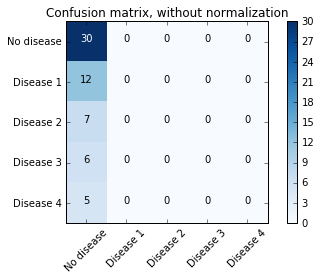

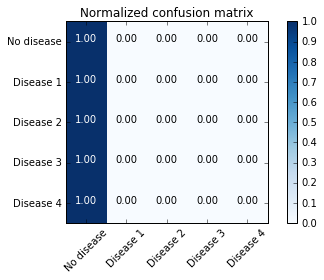

In [63]:
clf = SVC(kernel="rbf")
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, Radial Basis Function')

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Try different scaling methods:

In [64]:
clf =  Pipeline(steps=[('scaling', scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, Radial Basis Function scaled')

clf =  Pipeline(steps=[('scaling',Robust_scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, Radial Basis Function Robust scaled')

clf =  Pipeline(steps=[('scaling', Quantile_scalar), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, Radial Basis Function Normal scaled')

clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, Radial Basis Function scaled & selected')

The accuracy is of a support vector machine, Radial Basis Function scaled is:  0.55
There are 28 healthy people correctly identified vs 5 sick ones. See:
 [[28  0  1  0  1]
 [ 6  2  1  2  1]
 [ 1  0  2  2  2]
 [ 0  0  5  0  1]
 [ 0  1  1  2  1]]
             precision    recall  f1-score   support

        0.0       0.93      0.80      0.86        35
        1.0       0.17      0.67      0.27         3
        2.0       0.29      0.20      0.24        10
        3.0       0.00      0.00      0.00         6
        4.0       0.20      0.17      0.18         6

avg / total       0.62      0.55      0.57        60

The accuracy is of a support vector machine, Radial Basis Function Robust scaled is:  0.483333333333
There are 25 healthy people correctly identified vs 4 sick ones. See:
 [[25  5  0  0  0]
 [ 6  2  1  2  1]
 [ 1  0  2  4  0]
 [ 0  1  5  0  0]
 [ 1  1  0  3  0]]
             precision    recall  f1-score   support

        0.0       0.83      0.76      0.79        33
        1.

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall'

In [65]:
# trying poly
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="poly"))])
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, Poly, scaled & clustered')

The accuracy is of a support vector machine, Poly, scaled & clustered is:  0.566666666667
There are 29 healthy people correctly identified vs 5 sick ones. See:
 [[29  1  0  0  0]
 [ 6  5  1  0  0]
 [ 3  2  0  0  2]
 [ 0  4  0  0  2]
 [ 2  2  1  0  0]]
             precision    recall  f1-score   support

        0.0       0.97      0.72      0.83        40
        1.0       0.42      0.36      0.38        14
        2.0       0.00      0.00      0.00         2
        3.0       0.00      0.00      0.00         0
        4.0       0.00      0.00      0.00         4

avg / total       0.74      0.57      0.64        60



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


There seems to lay far too much weight on the first category due to their high number. 

##### Try other peoples classifiers:

In [66]:
#used some ideas from http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#linear kernel
def svm_linear(features_train, features_test, labels_train, labels_test):

    clf = svm.SVC(
        C=1.0, 
        kernel='linear', 
        probability=False, 
        shrinking=True, 
        tol=1e-3, 
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None,
        random_state=None)

    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    print("Kernel: Linear")
    print("Performance: "  + str(clf.score(features_test, labels_test)))
    print("")
    return pred

#polynomial kernel from degrees 2 to 5
def svm_poly(features_train, features_test, labels_train, labels_test):

    for d in [2, 3, 4, 5]:	

        clf = svm.SVC(
            C=1.0,
            kernel='poly', 
            degree=d,
            gamma='auto',
            coef0=0.0,
            probability=False,
            shrinking=True,
            tol=1e-3,
            verbose=False,
            max_iter=400000,
            decision_function_shape=None,
            random_state=None)
        clf.fit(features_train, labels_train)
        pred = clf.predict(features_test)
        print("Kernel: Polynomial")
        print("Degree: " + str(d))
        print("Performance: "  + str(clf.score(features_test, labels_test)))
        print("")
    return pred

#radial basis function kernel
def svm_rbf(features_train, features_test, labels_train, labels_test):

    clf = svm.SVC(
        C=1.0,
        kernel='rbf',
        gamma='auto',
        probability=False,
        shrinking=True,
        tol=1e-3,
        verbose=False,
        max_iter=-1,
        decision_function_shape=None,
        random_state=None)

    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    print("Kernel: Radial Basis Function")
    print("Performance: "  + str(clf.score(features_test, labels_test)))
    print("")
    return pred

#sigmoid function kernel
def svm_sigmoid(features_train, features_test, labels_train, labels_test):

    clf = svm.SVC(
        C=1.0,
        kernel='sigmoid',
        gamma='auto',
        coef0=0.0,
        probability=False,
        shrinking=True,
        tol=1e-3,
        verbose=False,
        max_iter=-1,
        decision_function_shape=None,
        random_state=None)
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    print("Kernel: Sigmoid")
    print("Performance: "  + str(clf.score(features_test, labels_test)))
    print("")
    return pred

In [67]:
#Run SVM with a linear kernel
pred = svm_linear(features_train, features_test, labels_train, labels_test)
checkmetrics(pred, labels_test, 'linearSVM, from function')

#Run SVM with a polynomial kernel
pred = svm_poly(features_train, features_test, labels_train, labels_test)
checkmetrics(pred, labels_test, 'polySVM, from function')

#Run SVM with a radial basis function kernel
pred = svm_rbf(features_train, features_test, labels_train, labels_test)
checkmetrics(pred, labels_test, 'RBFSVM, from function')

#Run SVM with a sigmoid kernel
pred = svm_sigmoid(features_train, features_test, labels_train, labels_test)
checkmetrics(pred, labels_test, 'SIGSVM, from function')

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Kernel: Linear
Performance: 0.566666666667

The accuracy is of a linearSVM, from function is:  0.566666666667
There are 28 healthy people correctly identified vs 6 sick ones. See:
 [[28  2  0  0  0]
 [ 6  2  1  2  1]
 [ 1  1  2  3  0]
 [ 0  0  4  2  0]
 [ 2  0  1  2  0]]
             precision    recall  f1-score   support

        0.0       0.93      0.76      0.84        37
        1.0       0.17      0.40      0.24         5
        2.0       0.29      0.25      0.27         8
        3.0       0.33      0.22      0.27         9
        4.0       0.00      0.00      0.00         1

avg / total       0.68      0.57      0.61        60



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=400000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Kernel: Polynomial
Degree: 2
Performance: 0.366666666667

Kernel: Polynomial
Degree: 3
Performance: 0.416666666667

Kernel: Polynomial
Degree: 4
Performance: 0.416666666667

Kernel: Polynomial
Degree: 5
Performance: 0.5

The accuracy is of a polySVM, from function is:  0.5
There are 21 healthy people correctly identified vs 9 sick ones. See:
 [[21  6  2  1  0]
 [ 4  4  1  2  1]
 [ 3  1  3  0  0]
 [ 0  3  0  2  1]
 [ 2  2  0  1  0]]
             precision    recall  f1-score   support

        0.0       0.70      0.70      0.70        30
        1.0       0.33      0.25      0.29        16
        2.0       0.43      0.50      0.46         6
        3.0       0.33      0.33      0.33         6
        4.0       0.00      0.00      0.00         2

avg / total       0.52      0.50      0.51        60

Kernel: Radial Basis Function
Performance: 0.5

The accuracy is of a RBFSVM, from function is:  0.5
There are 30 healthy people correctly identified vs 0 sick ones. See:
 [[30  0  0  0  0]
 

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Although the Linear one is performing a little bit better here, there seems to be a very big focus on the non-disease. Still not good: try some automatic tuning: trying gridsearch

In [68]:
#### Can we use gridsearch for feature selection?

# still not good: try some automatic tuning:
# trying gridsearch
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler), ("Grid", grid)])
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, with gridsearch')

parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ("Grid", grid)])
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, with gridsearch & only the best 2 features')

parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb7), ("Grid", grid)])
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'support vector machine, with gridsearch & only the best 7 features')

IndexError: too many indices for array

Maybe we were just unlucky, had a difficult split? We have a relatively small dataset. Therefore, we should do our feature selection based on a cross-validated set. Let's check if the scoring is the same on a cross validated set.

In [ ]:
# We have an relatively small dataset. Therefore, we should do our feature selection based on a cross-
# validated set. Let's check if the scoring is the same on a cross validated set.

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
# split into 5
scores = cross_val_score(clf, features_train_cross, labels_train_cross, cv=5)
                                            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=0.2)
# split into 5
scores = cross_val_score(clf, features_train_cross, labels_train_cross, cv=5)
                                            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=0.1)
# split into 5
scores = cross_val_score(clf, features_train_cross, labels_train_cross, cv=5)
                                            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
# That accuracy seems a bit higher. 

In [ ]:
feature.names=names(heart.data)

for (f in feature.names) {
  if (class(heart.data[[f]])=="factor") {
    levels <- unique(c(heart.data[[f]]))
    heart.data[[f]] <- factor(heart.data[[f]],
                   labels=make.names(levels))
  }
}
set.seed(10)
inTrainRows <- createDataPartition(heart.data$num,p=0.7,list=FALSE)
trainData2 <- heart.data[inTrainRows,]
testData2 <-  heart.data[-inTrainRows,]


fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using
                           ## the following function
                           summaryFunction = twoClassSummary)

set.seed(10)
gbmModel <- train(num ~ ., data = trainData2,
                 method = "gbm",
                 trControl = fitControl,
                 verbose = FALSE,
                 tuneGrid = gbmGrid,
                 ## Specify which metric to optimize
                 metric = "ROC")
gbmPrediction <- predict(gbmModel, testData2)
gbmPredictionprob <- predict(gbmModel, testData2, type='prob')[2]
gbmConfMat <- confusionMatrix(gbmPrediction, testData2[,"num"])
#ROC Curve
AUC$gbm <- roc(as.numeric(testData2$num),as.numeric(as.matrix((gbmPredictionprob))))$auc
Accuracy$gbm <- gbmConfMat$overall['Accuracy']

In [ ]:
set.seed(10)
svmModel <- train(num ~ ., data = trainData2,
                 method = "svmRadial",
                 trControl = fitControl,
                 preProcess = c("center", "scale"),
                 tuneLength = 8,
                 metric = "ROC")
svmPrediction <- predict(svmModel, testData2)
svmPredictionprob <- predict(svmModel, testData2, type='prob')[2]
svmConfMat <- confusionMatrix(svmPrediction, testData2[,"num"])
#ROC Curve
AUC$svm <- roc(as.numeric(testData2$num),as.numeric(as.matrix((svmPredictionprob))))$auc
Accuracy$svm <- svmConfMat$overall['Accuracy'] 